In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

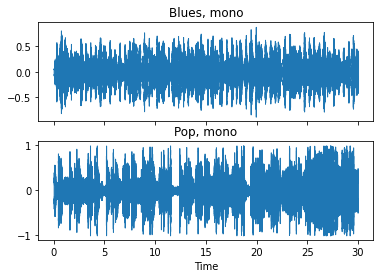

In [2]:
blues_path = "/Users/bonjarlow/Desktop/ML/spr22/ML-project-local/genres/blues/blues.00000.wav"
pop_path = "/Users/bonjarlow/Desktop/ML/spr22/ML-project-local/genres/pop/pop.00000.wav"

y_blues, sr_blues = librosa.load(blues_path)
y_pop, sr_pop = librosa.load(pop_path)

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.waveshow(y_blues, sr=sr_blues, ax=ax[0])
ax[0].set(title='Blues, mono')
ax[0].label_outer()

librosa.display.waveshow(y_pop, sr=sr_pop, ax=ax[1])
ax[1].set(title='Pop, mono')
ax[1].label_outer()

In [40]:
sr_blues

22050

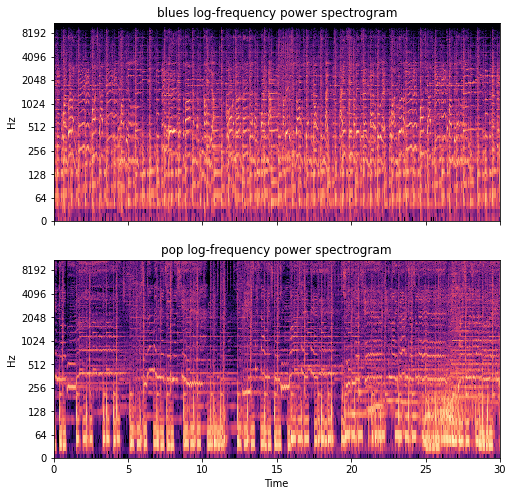

In [3]:
fig, ax = plt.subplots(figsize=(8,8), nrows=2, ncols=1, sharex=True)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y_blues)), ref=np.max)
img = librosa.display.specshow(D, y_axis='log', x_axis='time',sr=sr_blues, ax=ax[0])
ax[0].set(title='blues log-frequency power spectrogram')
ax[0].label_outer()

Dpop = librosa.amplitude_to_db(np.abs(librosa.stft(y_pop)), ref=np.max)
img = librosa.display.specshow(Dpop, y_axis='log', x_axis='time',sr=sr_pop, ax=ax[1])
ax[1].set(title='pop log-frequency power spectrogram')
ax[1].label_outer()

In [4]:
#fig.savefig('spectrogram.png')

In [5]:
len(y_blues)

661794

In [5]:
chunk = int(661794/3)

In [6]:
y_blues1 = y_blues[0:chunk]

In [7]:
y_blues2 = y_blues[chunk:2*chunk]
y_blues3 = y_blues[2*chunk:3*chunk]

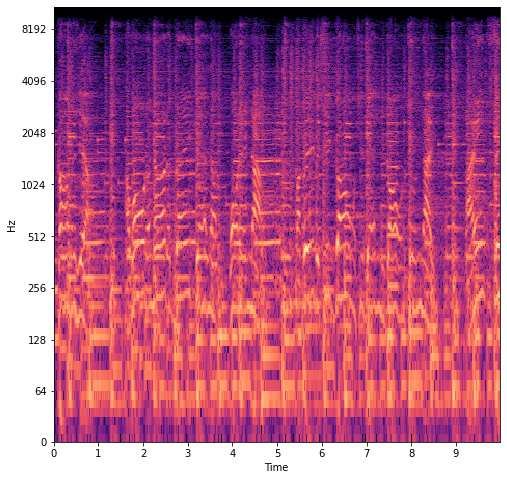

In [9]:
fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1, sharex=True)

#ax.set_axis_off()

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y_blues2)), ref=np.max)
img = librosa.display.specshow(D1, y_axis='log', x_axis='time',sr=sr_blues, ax=ax)

In [10]:
fig.savefig('out.png', bbox_inches='tight', transparent=True, pad_inches=0.0)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

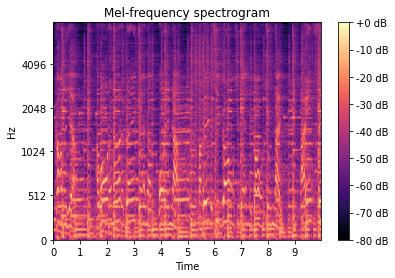

In [39]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=y_blues2, sr=sr_blues, n_mels=256,
                                    fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr_blues,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [4]:
import os
import pandas as pd
directory = 'genres'

df = pd.DataFrame(columns =['filename','data','sr'])

for folders in os.listdir(directory):
    # folders in 'genres'
    if folders != '.DS_Store':
        for filename in os.listdir(directory+"/"+folders):
            f = os.path.join(directory, folders, filename)
            data, sr = librosa.load(f)
            insert_data = {'filename':str(f), 'data': data, 'sr': sr}
            df = df.append(insert_data, ignore_index=True)

In [5]:
df

,filename,data,sr
0,genres/pop/pop.00027.wav,"[0.03451538, 0.04815674, 0.06430054, 0.0982055...",22050
1,genres/pop/pop.00033.wav,"[-0.0019836426, 0.06552124, 0.1253357, 0.11224...",22050
2,genres/pop/pop.00032.wav,"[0.012359619, -0.0107421875, -0.03161621, -0.0...",22050
3,genres/pop/pop.00026.wav,"[-0.004119873, -0.013946533, -0.009338379, -0....",22050
4,genres/pop/pop.00030.wav,"[-0.11010742, -0.15396118, 0.025970459, 0.1386...",22050
...,...,...,...
995,genres/jazz/jazz.00018.wav,"[3.0517578e-05, 0.018920898, 0.026275635, 0.02...",22050
996,genres/jazz/jazz.00032.wav,"[0.001159668, 0.0006713867, -0.004180908, -0.0...",22050
997,genres/jazz/jazz.00026.wav,"[0.0019836426, 0.0014343262, -0.0017089844, -0...",22050
998,genres/jazz/jazz.00027.wav,"[0.01651001, 0.02923584, 0.030151367, 0.035400...",22050


In [8]:
# make directories to store mel spectrograms

genres = ['blues', 'classical', 'country', 'disco', 'pop', 'hiphop', 'metal', 'reggae', 'rock', 'jazz']

for g in genres:
    name = 'mel_spectrograms_3sec/' + g
    os.makedirs(name)

In [15]:
for fn, data, sr in zip(df['filename'], df['data'], df['sr']):
    #split_size = int(len(data)/3) #split 30 second audio data into 3 10-second segements
    split_size = int(661790/10) #split 30 second audio data into 10 3-second segments
    
    path, num, ext = fn.split('.')
    top_dir, mid_dir, low_dir = path.split('/')
    new_path = 'mel_spectrograms_3sec' + "/" + mid_dir + "/" + low_dir
    
    for i in range(10):
        fig, ax = plt.subplots()
        ax.set_axis_off()
        
        #make the mel spectrogram
        split_data = data[i*split_size:(i+1)*split_size]
        S = librosa.feature.melspectrogram(y=split_data, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000);
        
        #save it in new directory mel_spectrograms/*genre name*/*genre name*.number_split.png
        filename = new_path + '.' + num + '_' + str(i) + '.png'
        
        fig.savefig(filename, bbox_inches='tight', transparent=True, pad_inches=0.0)
        fig.clf()
        plt.close(fig)

In [50]:
for fn, data, sr in zip(df['filename'], df['data'], df['sr']):
    for i in range(3):
        path, num, ext = fn.split('.')
        top_dir, mid_dir, low_dir = path.split('/')
        new_path = 'mel_spectrograms' + "/" + mid_dir + "/" + low_dir
        print(new_path + '.' + num + '_' + str(i) + '.png' )

mel_spectrograms/pop/pop.00027_0.png
mel_spectrograms/pop/pop.00027_1.png
mel_spectrograms/pop/pop.00027_2.png
mel_spectrograms/pop/pop.00033_0.png
mel_spectrograms/pop/pop.00033_1.png
mel_spectrograms/pop/pop.00033_2.png
mel_spectrograms/pop/pop.00032_0.png
mel_spectrograms/pop/pop.00032_1.png
mel_spectrograms/pop/pop.00032_2.png
mel_spectrograms/pop/pop.00026_0.png
mel_spectrograms/pop/pop.00026_1.png
mel_spectrograms/pop/pop.00026_2.png
mel_spectrograms/pop/pop.00030_0.png
mel_spectrograms/pop/pop.00030_1.png
mel_spectrograms/pop/pop.00030_2.png
mel_spectrograms/pop/pop.00024_0.png
mel_spectrograms/pop/pop.00024_1.png
mel_spectrograms/pop/pop.00024_2.png
mel_spectrograms/pop/pop.00018_0.png
mel_spectrograms/pop/pop.00018_1.png
mel_spectrograms/pop/pop.00018_2.png
mel_spectrograms/pop/pop.00019_0.png
mel_spectrograms/pop/pop.00019_1.png
mel_spectrograms/pop/pop.00019_2.png
mel_spectrograms/pop/pop.00025_0.png
mel_spectrograms/pop/pop.00025_1.png
mel_spectrograms/pop/pop.00025_2.png
m

mel_spectrograms/reggae/reggae.00058_0.png
mel_spectrograms/reggae/reggae.00058_1.png
mel_spectrograms/reggae/reggae.00058_2.png
mel_spectrograms/reggae/reggae.00070_0.png
mel_spectrograms/reggae/reggae.00070_1.png
mel_spectrograms/reggae/reggae.00070_2.png
mel_spectrograms/reggae/reggae.00064_0.png
mel_spectrograms/reggae/reggae.00064_1.png
mel_spectrograms/reggae/reggae.00064_2.png
mel_spectrograms/reggae/reggae.00065_0.png
mel_spectrograms/reggae/reggae.00065_1.png
mel_spectrograms/reggae/reggae.00065_2.png
mel_spectrograms/reggae/reggae.00071_0.png
mel_spectrograms/reggae/reggae.00071_1.png
mel_spectrograms/reggae/reggae.00071_2.png
mel_spectrograms/reggae/reggae.00059_0.png
mel_spectrograms/reggae/reggae.00059_1.png
mel_spectrograms/reggae/reggae.00059_2.png
mel_spectrograms/reggae/reggae.00098_0.png
mel_spectrograms/reggae/reggae.00098_1.png
mel_spectrograms/reggae/reggae.00098_2.png
mel_spectrograms/reggae/reggae.00067_0.png
mel_spectrograms/reggae/reggae.00067_1.png
mel_spectro

mel_spectrograms/jazz/jazz.00095_0.png
mel_spectrograms/jazz/jazz.00095_1.png
mel_spectrograms/jazz/jazz.00095_2.png
mel_spectrograms/jazz/jazz.00081_0.png
mel_spectrograms/jazz/jazz.00081_1.png
mel_spectrograms/jazz/jazz.00081_2.png
mel_spectrograms/jazz/jazz.00056_0.png
mel_spectrograms/jazz/jazz.00056_1.png
mel_spectrograms/jazz/jazz.00056_2.png
mel_spectrograms/jazz/jazz.00042_0.png
mel_spectrograms/jazz/jazz.00042_1.png
mel_spectrograms/jazz/jazz.00042_2.png
mel_spectrograms/jazz/jazz.00046_0.png
mel_spectrograms/jazz/jazz.00046_1.png
mel_spectrograms/jazz/jazz.00046_2.png
mel_spectrograms/jazz/jazz.00052_0.png
mel_spectrograms/jazz/jazz.00052_1.png
mel_spectrograms/jazz/jazz.00052_2.png
mel_spectrograms/jazz/jazz.00085_0.png
mel_spectrograms/jazz/jazz.00085_1.png
mel_spectrograms/jazz/jazz.00085_2.png
mel_spectrograms/jazz/jazz.00091_0.png
mel_spectrograms/jazz/jazz.00091_1.png
mel_spectrograms/jazz/jazz.00091_2.png
mel_spectrograms/jazz/jazz.00090_0.png
mel_spectrograms/jazz/jaz

AttributeError: 'QuadMesh' object has no attribute 'savefig'

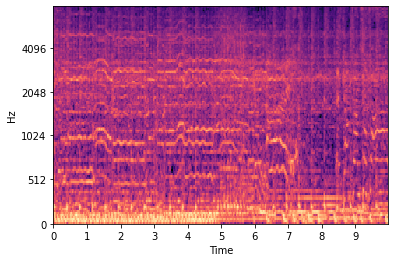

In [59]:
S = librosa.feature.melspectrogram(y=split_data, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000);
img.savefig('out.png')

In [10]:
661790/10

66179.0